In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

num_samples= 800

#ID
ID = ['ID' + str(count).zfill(3) for count in range(num_samples)]

#Group
group= np.random.choice(['A', 'B', 'C'], size=num_samples, p=[1/3, 1/3, 1/3])

#Feature 1
feature_1= np.random.normal(2500, 300, num_samples)

#Feature 2
feature_2= np.random.normal(400, 15, num_samples)

#Feature 3
random_values = np.random.normal(0, 12, num_samples)

feature_3_a = (3 * feature_1) - (5 * feature_2) + random_values
feature_3_b = (2 * feature_1) + random_values
feature_3_c = (-feature_1 + feature_2) + random_values

feature_3 = np.where(group == 'A', feature_3_a, np.where(group == 'B', feature_3_b, feature_3_c))

#Dataframe
df = pd.DataFrame({'ID': ID, 'group': group, 'Feature 1': feature_1, 'Feature 2': feature_2,'Feature 3': feature_3})

print(df.head())

      ID group    Feature 1   Feature 2    Feature 3
0  ID000     C  2818.190330  397.446046 -2422.156892
1  ID001     A  2923.537868  414.841178  6705.894452
2  ID002     B  2946.207586  413.859103  5898.012308
3  ID003     B  2098.797944  392.765726  4209.862095
4  ID004     C  2172.325733  369.890043 -1818.030243


In [116]:
# Question 2
#a. Based on the theoretical distribution of Feature 1, how many samples do you expect to find where the value of the feature is greater than 3000?
#You would expect approximately 5% of the Feature 1 to be above 3000, or about 40 samples. I approximated this value by finding the zscore for a score of 3000, which was about 1.67. 
#Looking at confidence intervals for this zscore I got about 10%, and then divided it by 2 to only reflect above 3000. 

#b. How many samples did you actually find where Feature_1 is greater than 3000?
f1_above3000= np.sum(feature_1>3000)
print ('Number of samples where Feature 1 is greater than 3000:', f1_above3000)

#c. Group the dataset by the Group field and compute the mean and standard deviation ofFeature_3 within each group.
mean = df.groupby('group').mean()['Feature 3']
std= df.groupby('group').std()['Feature 3']
print('Mean of feature 3 by group: \n', mean )
print('Standard deviation of feature 3 by group: \n', std )

Number of samples where Feature 1 is greater than 3000: 47
Mean of feature 3 by group: 
 group
A    5360.576773
B    5029.108340
C   -2124.202858
Name: Feature 3, dtype: float64
Standard deviation of feature 3 by group: 
 group
A    948.249345
B    585.575168
C    303.604761
Name: Feature 3, dtype: float64


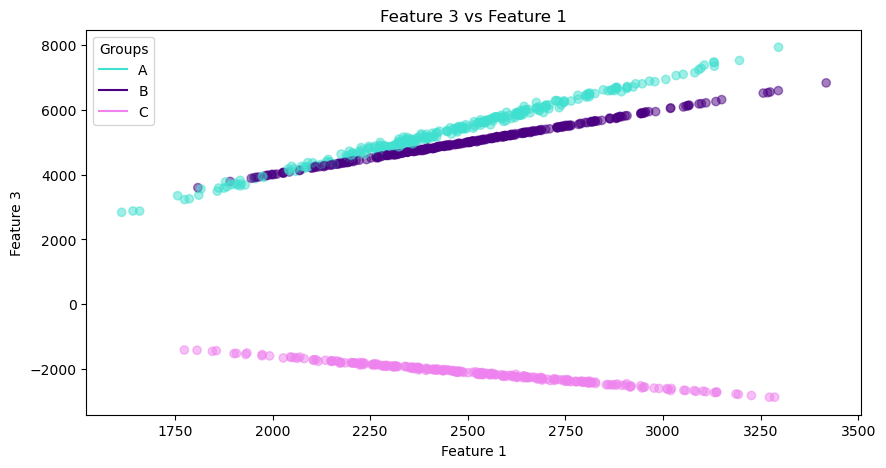

In [121]:
#3 Make a scatterplot
fig = plt.figure(figsize=(10, 5))
plt.scatter(df['Feature 1'], df['Feature 3'], alpha=0.5, c=df['group'].map({'A': 'turquoise', 'B': 'indigo', 'C': 'violet'}))

# Plot labels 
plt.title('Feature 3 vs Feature 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')

# needed to add handles to make sure A, B, and C all appeared in legend
handles = [plt.Line2D([], [], color=color) for color in ['turquoise', 'indigo', 'violet']]
plt.legend(handles, ['A', 'B', 'C'], title='Groups')

plt.show()

In [123]:
#4. Write your constructed dataframe/tibble to a csv file called fake_data.csv
filename = 'fake_data.csv'
df.to_csv(filename, sep=',', index=False, encoding='utf-8')